In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [24]:
x_train = np.array([0.15,0.4])
y_train = np.array([300.0,500.0])

In [25]:
def compute_cost(x,y,w,b):
    m = x.shape[0]

    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i]) ** 2
    total_cost = cost / (2*m)

    return total_cost

In [26]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db


In [27]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
    J_history = []

    w = w_in
    b = b_in 

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        J_history.append(cost_function(x,y,w,b))

        if i% math.ceil(num_iters/10) == 0:
                print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                    f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                    f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w,b,J_history

In [33]:
w_init = 1
b_init = 1
alpha = 0.1
num_iters = 100000

w_final, b_final, J_history = gradient_descent(x_train,y_train,w_init,b_init, alpha, num_iters, compute_cost, compute_gradient)

Iteration    0: Cost 6.80e+04  dj_dw: -1.221e+02, dj_db: -3.987e+02   w:  1.321e+01, b: 4.08725e+01
Iteration 10000: Cost 9.17e-10  dj_dw: -4.976e-06, dj_db:  1.388e-06   w:  8.000e+02, b: 1.80000e+02
Iteration 20000: Cost 2.35e-22  dj_dw: -2.515e-12, dj_db:  7.105e-13   w:  8.000e+02, b: 1.80000e+02
Iteration 30000: Cost 1.15e-23  dj_dw: -5.613e-13, dj_db:  1.421e-13   w:  8.000e+02, b: 1.80000e+02
Iteration 40000: Cost 1.15e-23  dj_dw: -5.613e-13, dj_db:  1.421e-13   w:  8.000e+02, b: 1.80000e+02
Iteration 50000: Cost 1.15e-23  dj_dw: -5.613e-13, dj_db:  1.421e-13   w:  8.000e+02, b: 1.80000e+02
Iteration 60000: Cost 1.15e-23  dj_dw: -5.613e-13, dj_db:  1.421e-13   w:  8.000e+02, b: 1.80000e+02
Iteration 70000: Cost 1.15e-23  dj_dw: -5.613e-13, dj_db:  1.421e-13   w:  8.000e+02, b: 1.80000e+02
Iteration 80000: Cost 1.15e-23  dj_dw: -5.613e-13, dj_db:  1.421e-13   w:  8.000e+02, b: 1.80000e+02
Iteration 90000: Cost 1.15e-23  dj_dw: -5.613e-13, dj_db:  1.421e-13   w:  8.000e+02, b: 1.8

In [34]:
print(f"w final value:{w_final} & b final value:{b_final}")

w final value:799.9999999999615 & b final value:180.00000000001074


In [35]:
print(f"{0.15 * w_final + b_final}")
print(f"{0.4 * w_final + b_final}")

300.00000000000495
499.99999999999534


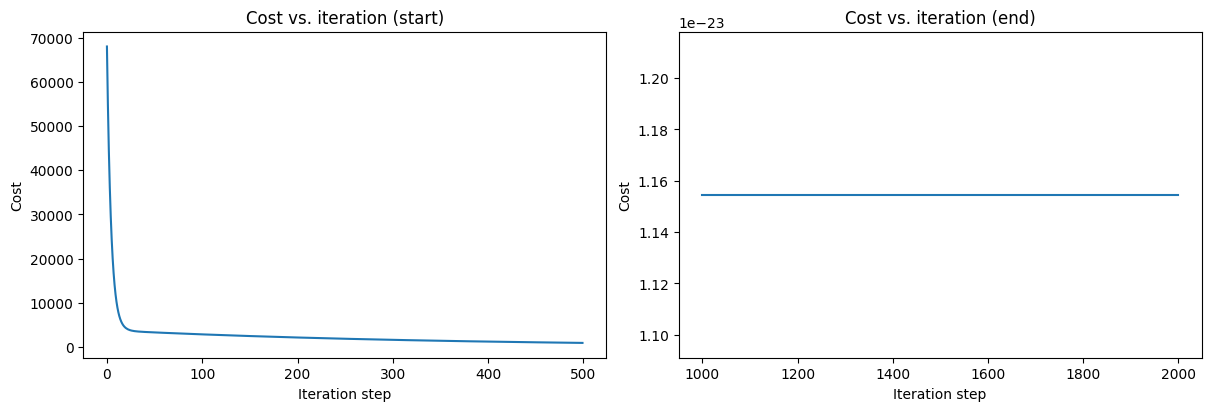

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

# First subplot - plot the first 500 iterations (or adjust as needed)
ax1.plot(J_history[:500])
ax1.set_title("Cost vs. iteration (start)")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iteration step')

# Second subplot - plot the last 1000 iterations (adjust as needed)
ax2.plot(1000 + np.arange(len(J_history[-1000:])), J_history[-1000:])
ax2.set_title("Cost vs. iteration (end)")
ax2.set_ylabel('Cost')
ax2.set_xlabel('Iteration step')

plt.show()